In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data preparation

In [2]:
data = pd.read_csv('warsaw_climate.csv',
                   index_col='DATE'
                  )
data = data.rename(columns={
    'PRCP': 'Precipitation',
    'SNWD': 'Snow_Depth',
    'TAVG': 'AvgTemp'
})
print(data)

                STATION        NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                  
1993-01-01  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
1993-01-02  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
1993-01-03  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
1993-01-04  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
1993-01-05  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
...                 ...         ...       ...        ...        ...   
2022-12-27  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
2022-12-28  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
2022-12-29  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
2022-12-30  PLM00012375  OKECIE, PL    52.166     20.967      110.3   
2022-12-31  PLM00012375  OKECIE, PL    52.166     20.967      110.3   

            Precipitation  Snow_Depth  AvgTemp  TMAX  TMIN  
DATE           

In [3]:
print(data.describe())

           LATITUDE     LONGITUDE     ELEVATION  Precipitation   Snow_Depth  \
count  1.095400e+04  1.095400e+04  1.095400e+04    9158.000000  1423.000000   
mean   5.216600e+01  2.096700e+01  1.103000e+02       1.790358    82.492621   
std    1.421150e-14  7.105752e-15  2.842301e-14       5.649012    85.352103   
min    5.216600e+01  2.096700e+01  1.103000e+02       0.000000    10.000000   
25%    5.216600e+01  2.096700e+01  1.103000e+02       0.000000    20.000000   
50%    5.216600e+01  2.096700e+01  1.103000e+02       0.000000    51.000000   
75%    5.216600e+01  2.096700e+01  1.103000e+02       1.500000   109.000000   
max    5.216600e+01  2.096700e+01  1.103000e+02     255.000000   531.000000   

            AvgTemp         TMAX         TMIN  
count  10954.000000  7463.000000  5870.000000  
mean       9.114241    13.919188     4.685826  
std        8.671128     9.699870     7.780249  
min      -22.300000   -16.700000   -27.100000  
25%        2.400000     6.200000    -0.500000  


In [4]:
data.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION'], inplace=True)

In [5]:
print(data)

            Precipitation  Snow_Depth  AvgTemp  TMAX  TMIN
DATE                                                      
1993-01-01            0.0        10.0     -8.3   NaN   NaN
1993-01-02            NaN        10.0    -14.9   NaN   NaN
1993-01-03            0.0        10.0    -13.6  -9.7   NaN
1993-01-04            0.0        10.0    -10.5  -6.5 -13.3
1993-01-05            0.0        10.0    -12.0  -8.9 -14.1
...                   ...         ...      ...   ...   ...
2022-12-27            8.4         NaN      4.7   9.4   2.7
2022-12-28            0.0         NaN      3.3   NaN   NaN
2022-12-29            0.5         NaN      6.8   NaN   3.7
2022-12-30            0.0         NaN      6.1   9.2   NaN
2022-12-31            NaN         NaN      9.4   NaN   0.3

[10954 rows x 5 columns]


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10954 entries, 1993-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  9158 non-null   float64
 1   Snow_Depth     1423 non-null   float64
 2   AvgTemp        10954 non-null  float64
 3   TMAX           7463 non-null   float64
 4   TMIN           5870 non-null   float64
dtypes: float64(5)
memory usage: 513.5+ KB
None


## Data Cleaning

In [7]:
precipitation_mean = data['Precipitation'].mean()
snow_depth_mean = data['Snow_Depth'].mean()
#AvgTemp mean calculation is not required, due to no NAN rows.

In [8]:
data['Precipitation'].fillna(data['Precipitation'].mean())

DATE
1993-01-01    0.000000
1993-01-02    1.790358
1993-01-03    0.000000
1993-01-04    0.000000
1993-01-05    0.000000
                ...   
2022-12-27    8.400000
2022-12-28    0.000000
2022-12-29    0.500000
2022-12-30    0.000000
2022-12-31    1.790358
Name: Precipitation, Length: 10954, dtype: float64

#### <span style="color:red"> Test with fulfilling NaN 'Snow Depth' data with total mean.
##### <span style="color:red"> Makes no sense due to average value shown also during high temperature.

In [9]:
data['Snow_Depth'].fillna(data['Snow_Depth'].mean())

DATE
1993-01-01    10.000000
1993-01-02    10.000000
1993-01-03    10.000000
1993-01-04    10.000000
1993-01-05    10.000000
                ...    
2022-12-27    82.492621
2022-12-28    82.492621
2022-12-29    82.492621
2022-12-30    82.492621
2022-12-31    82.492621
Name: Snow_Depth, Length: 10954, dtype: float64

In [10]:
def fill_snow_depth(row):
    if float(row['AvgTemp']) < 1:
        return row['Snow_Depth'] if pd.notna(row['Snow_Depth']) else (data['Snow_Depth'].mean()/5)  # in average 1 per 5 days snow lays
    else:
        return 0

In [11]:
data['Snow_Depth'] = data.apply(fill_snow_depth, axis=1)

In [12]:
data['Snow_Depth'].head(30)

DATE
1993-01-01    10.000000
1993-01-02    10.000000
1993-01-03    10.000000
1993-01-04    10.000000
1993-01-05    10.000000
1993-01-06    10.000000
1993-01-07     0.000000
1993-01-08     0.000000
1993-01-09    16.498524
1993-01-10     0.000000
1993-01-11     0.000000
1993-01-12     0.000000
1993-01-13     0.000000
1993-01-14     0.000000
1993-01-15     0.000000
1993-01-16     0.000000
1993-01-17     0.000000
1993-01-18     0.000000
1993-01-19     0.000000
1993-01-20     0.000000
1993-01-21     0.000000
1993-01-22     0.000000
1993-01-23     0.000000
1993-01-24     0.000000
1993-01-25     0.000000
1993-01-26    10.000000
1993-01-27    99.000000
1993-01-28    99.000000
1993-01-29    99.000000
1993-01-30    71.000000
Name: Snow_Depth, dtype: float64

In [13]:
data['Snow_Depth'].tail(50)

DATE
2022-11-12      0.000000
2022-11-13      0.000000
2022-11-14      0.000000
2022-11-15      0.000000
2022-11-16      0.000000
2022-11-17     16.498524
2022-11-18     16.498524
2022-11-19     16.498524
2022-11-20     16.498524
2022-11-21     16.498524
2022-11-22      0.000000
2022-11-23     16.498524
2022-11-24     16.498524
2022-11-25     30.000000
2022-11-26     16.498524
2022-11-27      0.000000
2022-11-28      0.000000
2022-11-29      0.000000
2022-11-30      0.000000
2022-12-01     16.498524
2022-12-02     16.498524
2022-12-03     16.498524
2022-12-04     16.498524
2022-12-05     16.498524
2022-12-06      0.000000
2022-12-07      0.000000
2022-12-08     16.498524
2022-12-09     16.498524
2022-12-10     16.498524
2022-12-11     16.498524
2022-12-12     16.498524
2022-12-13    119.000000
2022-12-14    130.000000
2022-12-15     16.498524
2022-12-16    130.000000
2022-12-17    160.000000
2022-12-18    150.000000
2022-12-19    150.000000
2022-12-20      0.000000
2022-12-21      0.00

In [14]:
data['Snow_Depth'].sample(50)

DATE
2012-09-05     0.000000
2019-11-26     0.000000
1999-07-02     0.000000
2016-01-11     0.000000
2004-07-28     0.000000
1999-07-27     0.000000
2005-10-15     0.000000
2008-09-25     0.000000
1995-07-21     0.000000
2015-05-05     0.000000
2017-05-23     0.000000
2013-09-13     0.000000
1994-02-27     0.000000
2017-05-10     0.000000
2015-05-22     0.000000
2019-06-05     0.000000
2007-01-11     0.000000
2011-12-04     0.000000
1993-11-18    51.000000
2005-04-02     0.000000
2008-06-21     0.000000
1994-10-07     0.000000
1999-10-08     0.000000
2011-09-27     0.000000
2019-12-21     0.000000
2014-09-29     0.000000
1998-07-18     0.000000
2007-02-24    30.000000
2021-05-02     0.000000
1994-04-01     0.000000
2001-08-15     0.000000
2018-09-19     0.000000
1996-04-02     0.000000
2008-08-26     0.000000
2001-02-11    16.498524
2006-06-27     0.000000
2011-10-20     0.000000
2012-07-27     0.000000
2014-10-26     0.000000
2000-09-23     0.000000
2003-04-29     0.000000
1994-02-17 

## Ploting

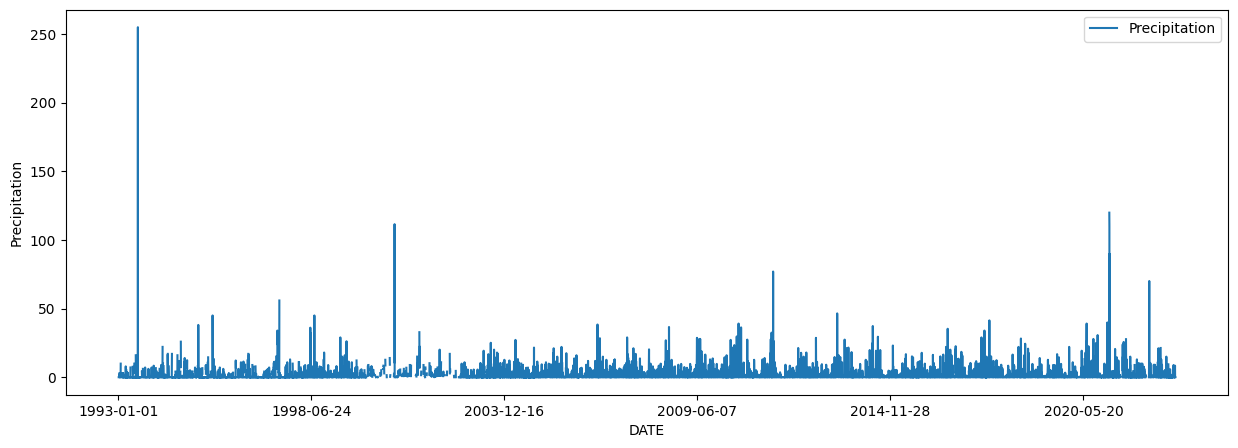

In [15]:
data.plot(
    y='Precipitation',
    ylabel='Precipitation',
    figsize=(15, 5),
);

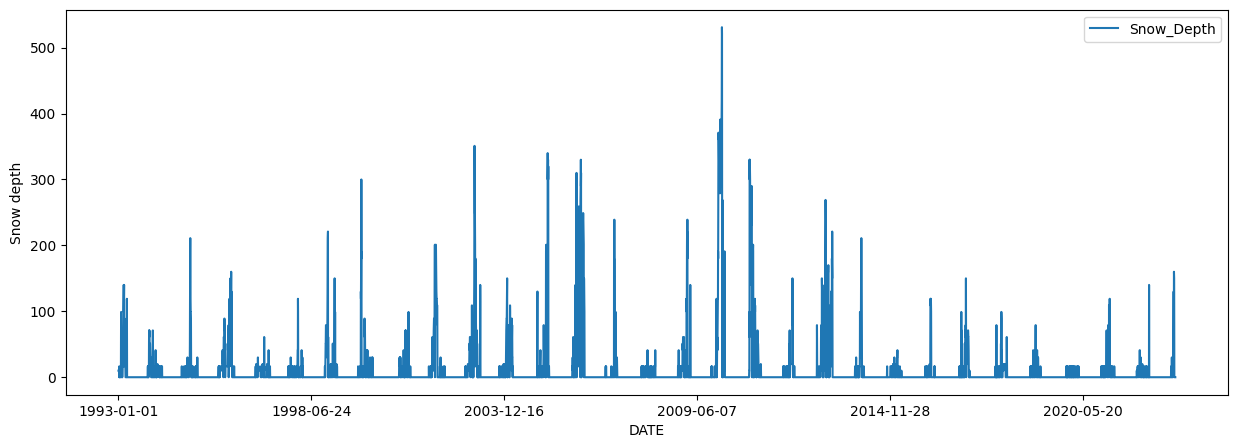

In [17]:
data.plot(
    y='Snow_Depth',
    ylabel='Snow depth',
    figsize=(15, 5),
);

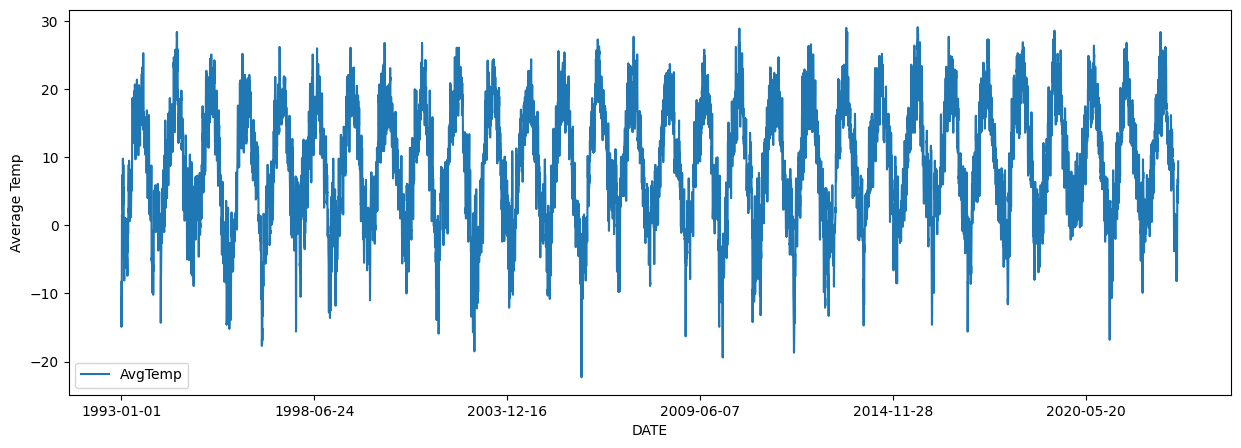

In [18]:
data.plot(
    y='AvgTemp',
    ylabel='Average Temp',
    figsize=(15, 5),
);

#### Rolling Mean Temp plotting

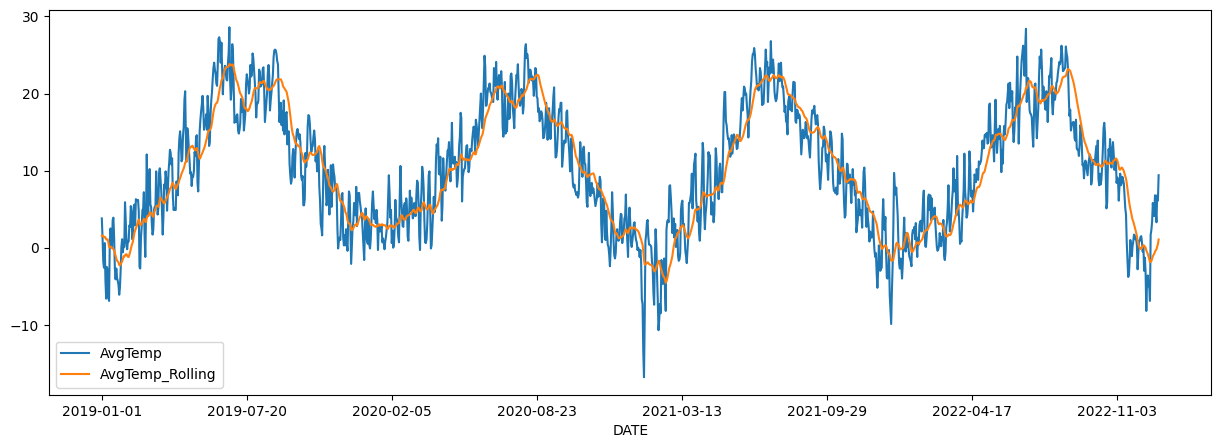

In [19]:
data.assign(
    AvgTemp_Rolling =lambda x: x['AvgTemp'].rolling(20).mean(),
)['2019-01-01':'2023'].plot(
    y=['AvgTemp', 'AvgTemp_Rolling'],
    figsize=(15, 5),
);

<Axes: xlabel='AvgTemp', ylabel='Snow_Depth'>

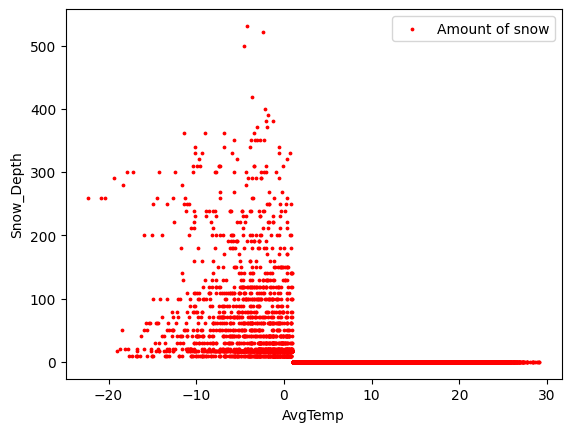

In [20]:
data.plot.scatter(x='AvgTemp', y='Snow_Depth', color='red', label='Amount of snow', s=3)

### AvgTemp year to year comparison

In [21]:
data.reset_index(inplace=True)

In [22]:
data["DATE"] = pd.to_datetime(data["DATE"], format = '%Y-%m-%d')
data = data.loc[(data['DATE'] >= '2017-01-01') & (data['DATE'] <= '2022-12-31')]
data['year'] = data['DATE'].dt.year
data["month"] = data["DATE"].dt.month
print(data.head())

           DATE  Precipitation  Snow_Depth  AvgTemp  TMAX  TMIN  year  month
8765 2017-01-01            0.0    0.000000      1.7   NaN  -0.3  2017      1
8766 2017-01-02            0.0   16.498524      0.9   NaN  -1.0  2017      1
8767 2017-01-03            0.8   10.000000     -0.7   NaN   NaN  2017      1
8768 2017-01-04            7.1    0.000000      1.3   2.5   NaN  2017      1
8769 2017-01-05            3.8   51.000000     -7.1   1.1   NaN  2017      1


C:\Users\User\AppData\Local\Temp\ipykernel_1100\1667930383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['DATE'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_1100\1667930383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"] = data["DATE"].dt.month


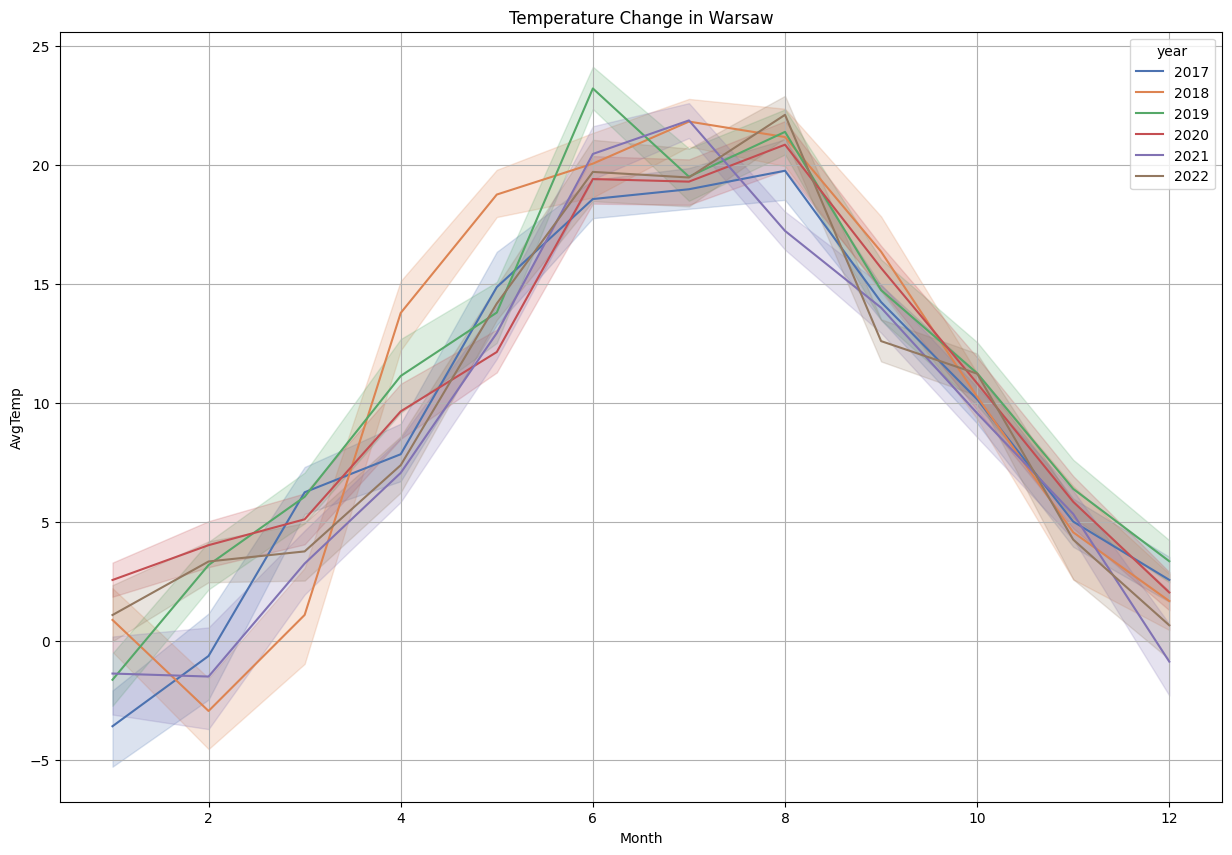

In [23]:
plt.figure(figsize=(15, 10))
plt.grid()
plt.title("Temperature Change in Warsaw")
plt.xlabel("Month")
plt.ylabel("AvgTemp")
sns.lineplot(data=data, x='month', y='AvgTemp', hue='year', palette='deep')
plt.show()

## AvgTemp Prediction Model

In [24]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
prediction_data = data.rename(columns = {"DATE": "ds", 
                                       "AvgTemp": "y"})
print(prediction_data)

              ds  Precipitation  Snow_Depth    y  TMAX  TMIN  year  month
8765  2017-01-01            0.0    0.000000  1.7   NaN  -0.3  2017      1
8766  2017-01-02            0.0   16.498524  0.9   NaN  -1.0  2017      1
8767  2017-01-03            0.8   10.000000 -0.7   NaN   NaN  2017      1
8768  2017-01-04            7.1    0.000000  1.3   2.5   NaN  2017      1
8769  2017-01-05            3.8   51.000000 -7.1   1.1   NaN  2017      1
...          ...            ...         ...  ...   ...   ...   ...    ...
10949 2022-12-27            8.4    0.000000  4.7   9.4   2.7  2022     12
10950 2022-12-28            0.0    0.000000  3.3   NaN   NaN  2022     12
10951 2022-12-29            0.5    0.000000  6.8   NaN   3.7  2022     12
10952 2022-12-30            0.0    0.000000  6.1   9.2   NaN  2022     12
10953 2022-12-31            NaN    0.000000  9.4   NaN   0.3  2022     12

[2189 rows x 8 columns]


In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(prediction_data)

07:43:31 - cmdstanpy - INFO - Chain [1] start processing
07:43:32 - cmdstanpy - INFO - Chain [1] done processing


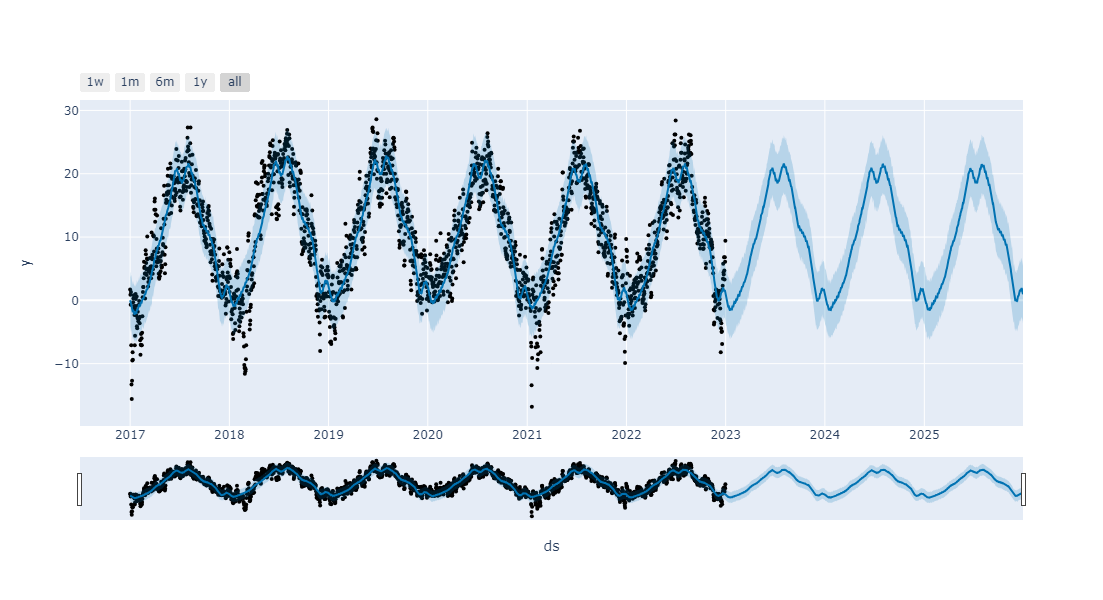

In [27]:
forecast_avg_temp = model.make_future_dataframe(periods=3*365)
predictions = model.predict(forecast_avg_temp)
plot_plotly(model, predictions)